In [3]:
from os.path import abspath, join
from glob import glob
import sys
current = abspath("")
root_dir = abspath(join(current, '..', '..'))
root_data_dir = join(root_dir, "Data")
import sys
if not root_dir in sys.path: 
    sys.path.append(root_dir)

In [2]:
from utils import (style, get_params, mcmc, plot_chain, plot_corner, plot_fit, calculate_prob, get_data, Model)

style()

In [4]:
z_dir_path = join(root_data_dir, 'Effective-Volume-no')
w_dir_path = join(root_data_dir, 'Velocity-Distribution-no')
z_dir_path, w_dir_path

('/home2/s20321005/Thesis-Project/Data/Effective-Volume-no',
 '/home2/s20321005/Thesis-Project/Data/Velocity-Distribution-no')

In [26]:
index = 0
z_files = glob(join(z_dir_path, "z*"))
z_files.sort()
w_files = glob(join(w_dir_path, "w*"))
w_files.sort()
name = z_files[index].split("/")[-1].replace(".hdf5", "").replace("z_", "")

result = mcmc(
    model=Model.DM,
    z_path=z_files[index],
    w_path=w_files[index],
    step0=100,
    step=1000,
    burn=1000,
    it=3,
    thin=20,
    m=10
)

result.keys()

running...
mcmc... (-0.10)_(0.11)


mcmc:   0%|          | 0/3 [00:00<?, ?it/s]

0: first half mcmc done 2.24 s


mcmc:  33%|███▎      | 1/3 [00:04<00:08,  4.42s/it]

0: second half mcmc done 2.16 s


mcmc:  67%|██████▋   | 2/3 [00:08<00:04,  4.39s/it]

1: first half mcmc done 2.19 s
1: second half mcmc done 2.17 s
2: first half mcmc done 2.17 s


mcmc: 100%|██████████| 3/3 [00:13<00:00,  4.37s/it]

2: second half mcmc done 2.13 s


dict_keys(['indexes', 'labs', 'labels', 'chain'])

In [27]:
indexes, labs, labels, chain = result.values()
indexes, labs, labels, chain.shape

([range(0, 12), 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
 array(['rhob', 'rhoDM', 'log_nu0', 'R', 'zsun', 'w0', 'log_sigmaw',
        'q_sigmaw', 'log_a', 'q_a', 'log_phi_b'], dtype='<U32'),
 array(['$\\rho_{b}$', '$\\rho_{\\textup{DM}}$', '$\\log \\nu_0$', '$R$',
        '$z_{\\odot}$', '$w_0$', '$\\log \\sigma_{w}$', '$q_{w}$',
        '$\\log a$', '$q_a$', '$\\log \\Phi_b$'], dtype='<U32'),
 (50, 340, 34))

100%|██████████| 11/11 [00:01<00:00,  8.38it/s]


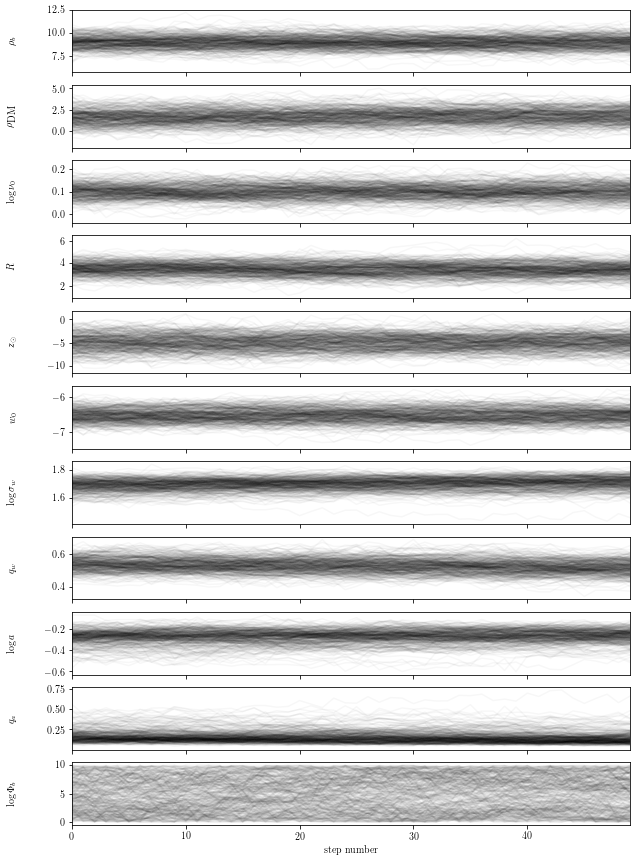

In [28]:
params = get_params(chain, indexes, labs)

plot_chain(
    params=params,
    labels=labels,
    alpha=0.03
)

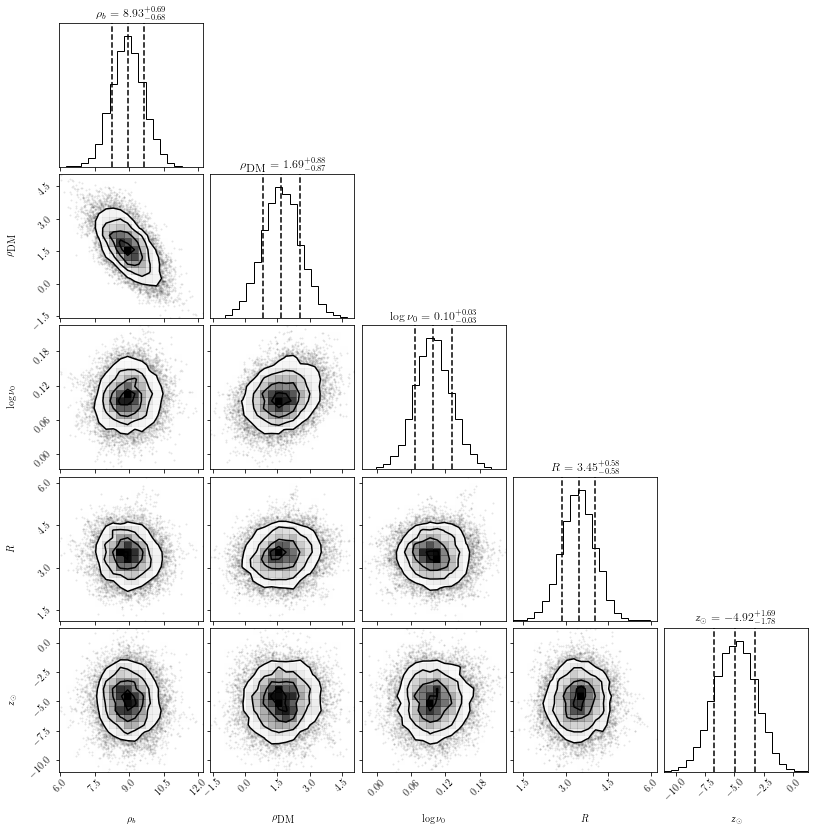

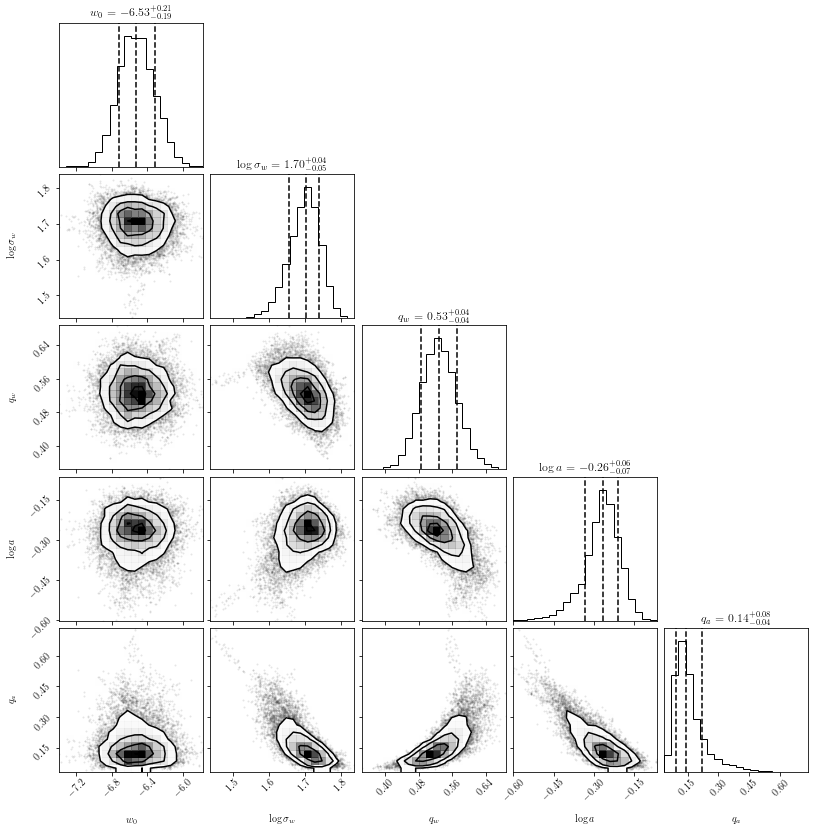

In [30]:
params = get_params(chain, indexes, labs)
bs =  {
    'DM': 5,
    'DDDM': 7,
    'NO': 4
}

b = bs[Model.DM.value]

# z
plot_corner(
    params=params[:,:,:b],
    labels=labels[:b],
)
# w
plot_corner(
    params=params[:,:,b:-1],
    labels=labels[b:-1],
)

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:26<00:00, 1891.38it/s]


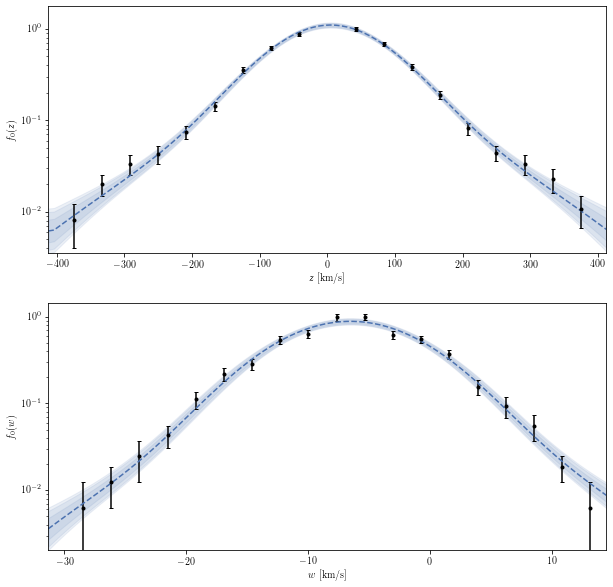

In [32]:
ndim = chain.shape[2]
flat_chain = chain.reshape((-1, ndim))

plot_fit(
    model=Model.DM,
    flat_chain=flat_chain,
    z_path=z_files[index],
    w_path=w_files[index],
    log=True,
    nsample=50_000,
    res=100
)

In [34]:
ndim = chain.shape[2]
flat_chain = chain.reshape((-1, ndim))
zdata = get_data(z_files[index])
wdata = get_data(w_files[index])

calculate_prob(
    model=Model.DM, 
    zdata=zdata,
    wdata=wdata,
    flat_chain=flat_chain,
    name=name,
    path="tes.txt",
    nsample=50_000,
)

Opening the data
Opening the chain
Calculating likelihood
max log-likelihood: 101.09803025807977
BIC: -42.0720336715402
AIC: -134.19606051615955


# Script

do mcmc for

* same $N$, different $z$
* same $z$, different $N$

Each 'running' contains
1. generate_init: initial position for walkers.
    * this is done by the experiment above.
2. run_mcmc: run true mcmc for 10_000 steps.
3. plot trace: plot trace plot for preliminary mcmc.
4. plot corner: plot corner plot for the long run.
5. plot fit: fitting plot for vertical density and vertical dispersion.
6. calculate bic & aic: calculate bic and aic for the long run.

All of these functionalities are implemented in `mcmc.py` at `utils`.

Just run the `program.py` at `script`.
To automate the process for all data, run `run_program.py` at `script`.

The script for comparing also implemented in `script` folder.